In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [10]:
print(df.head())
print("\nEstatísticas descritivas:")
print(df.describe())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Estatísticas descritivas:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.

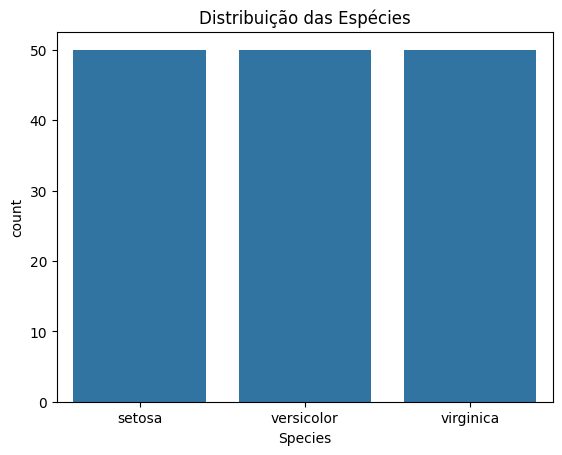

In [11]:
# Gráfico de distribuição de classes
sns.countplot(x='Species', data=df)
plt.title('Distribuição das Espécies')
plt.show()

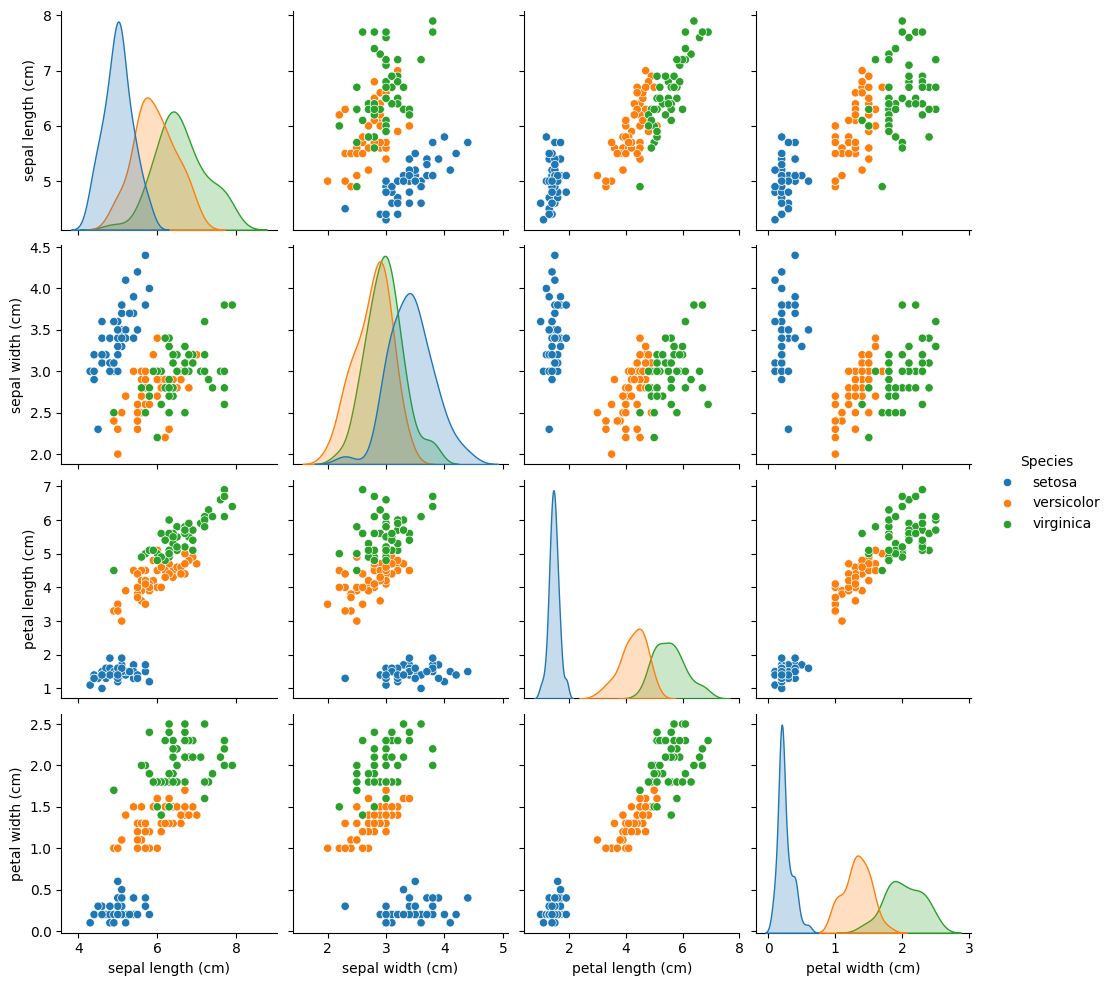

In [12]:
# Pairplot das características
sns.pairplot(df, hue='Species')
plt.show()

/tmp/ipykernel_4768/2458613481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipykernel_4768/2458613481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipykernel_4768/2458613481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
/tmp/ipykernel_4768/2458613481.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)


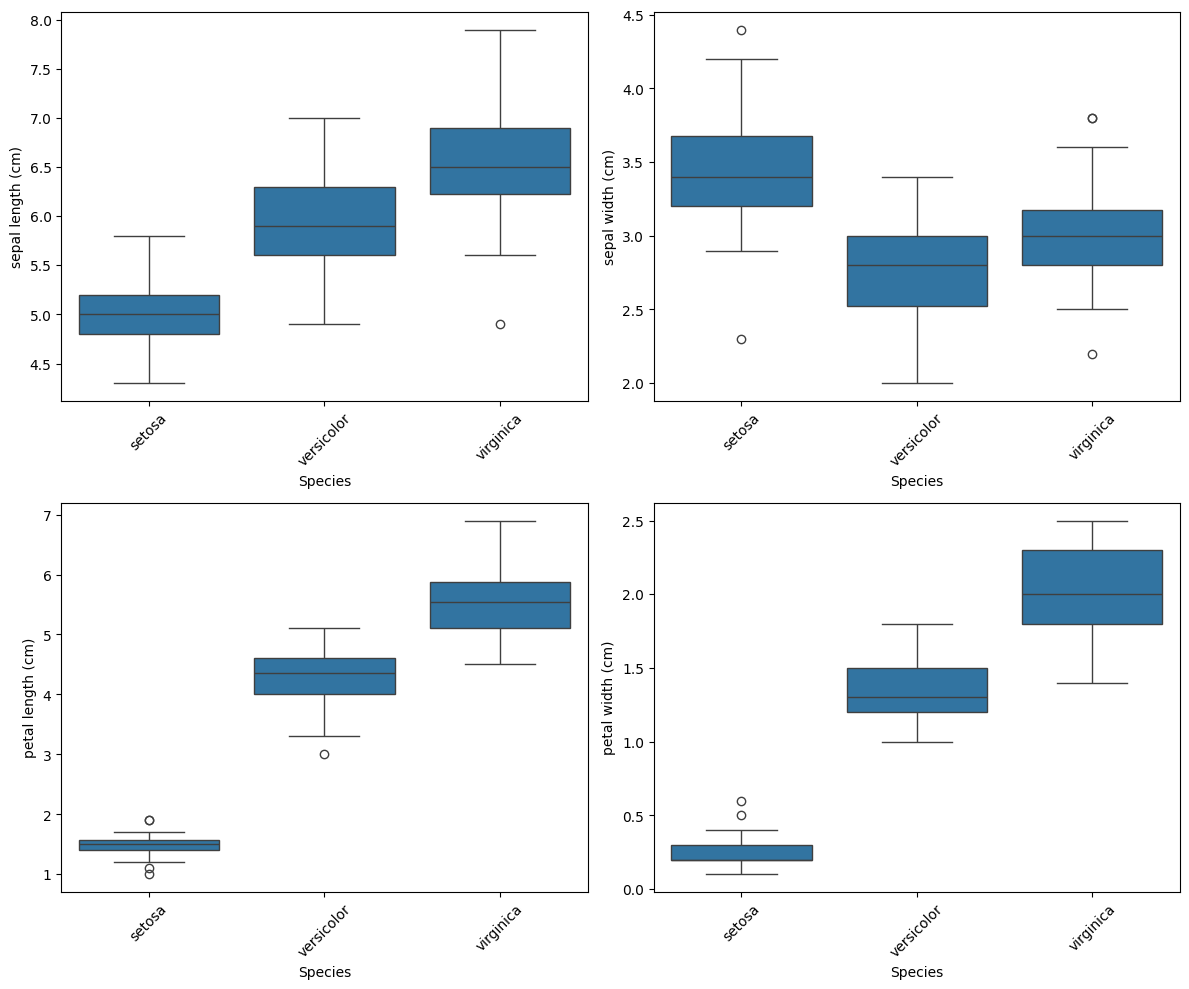

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(iris.feature_names):
    sns.boxplot(data=df, x='Species', y=feature, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# Preparação dos dados
X = df.drop('Species', axis=1)
y = pd.Categorical(df['Species']).codes

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


In [18]:
for name, clf in classifiers.items():
    print(f"\nAvaliando {name}...")
    
    # Validação cruzada
    cv_scores = cross_val_score(clf, X_train_scaled, y_train, cv=5)
    print(f"CV Scores: {cv_scores}")
    print(f"CV Mean: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Treinamento e predição
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    
    # Relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))


Avaliando KNN...
CV Scores: [0.9047619  0.95238095 1.         0.9047619  1.        ]
CV Mean: 0.952 (+/- 0.085)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45


Avaliando Logistic Regression...
CV Scores: [0.95238095 0.95238095 1.         1.         1.        ]
CV Mean: 0.981 (+/- 0.047)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.82      0.93      0.88        15
           2       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91    


Aplicação dos Algoritmos de Clusterização


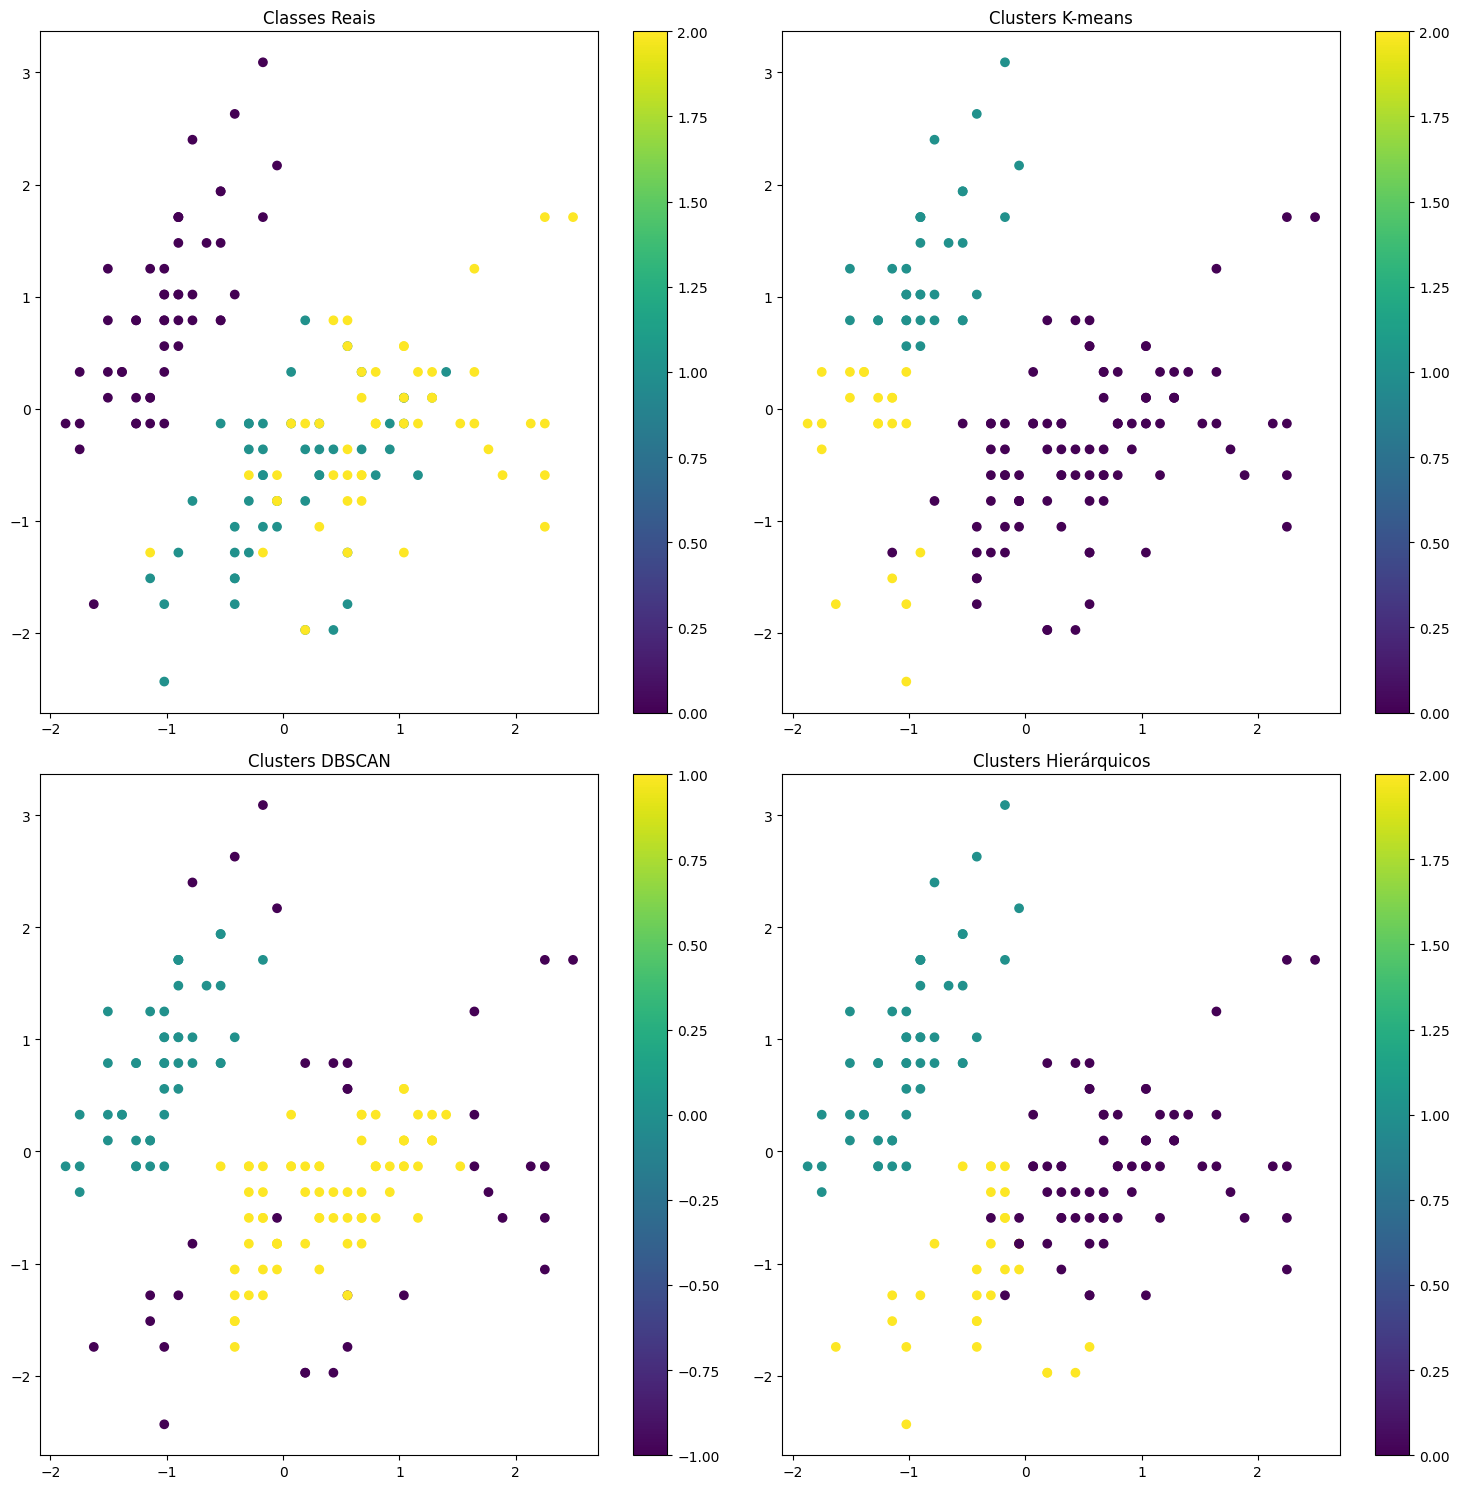

In [19]:
print("\nAplicação dos Algoritmos de Clusterização")
# Normaliza os dados completos para clusterização
X_scaled = scaler.fit_transform(X)

# K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Hierarchical Clustering
hierarch = AgglomerativeClustering(n_clusters=3)
hierarch_labels = hierarch.fit_predict(X_scaled)

# Visualização dos clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

# Classes reais
scatter = axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis')
axes[0].set_title('Classes Reais')
plt.colorbar(scatter, ax=axes[0])

# K-means
scatter = axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[1].set_title('Clusters K-means')
plt.colorbar(scatter, ax=axes[1])

# DBSCAN
scatter = axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[2].set_title('Clusters DBSCAN')
plt.colorbar(scatter, ax=axes[2])

# Hierarchical
scatter = axes[3].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarch_labels, cmap='viridis')
axes[3].set_title('Clusters Hierárquicos')
plt.colorbar(scatter, ax=axes[3])

plt.tight_layout()
plt.show()


In [21]:
print("\nAvaliação dos Resultados da Clusterização")
for name, labels in [('K-Means', kmeans_labels), ('DBSCAN', dbscan_labels), ('Hierarchical', hierarch_labels)]:
    if len(set(labels)) > 1:  # Ignora DBSCAN se todos forem ruído
        print(f"Silhouette Score para {name}: {silhouette_score(X_scaled, labels):.3f}")


Avaliação dos Resultados da Clusterização
Silhouette Score para K-Means: 0.480
Silhouette Score para DBSCAN: 0.357
Silhouette Score para Hierarchical: 0.447
